# Machine learning

## EXERCISE: Simple linear regression from scratch

[Adapted from Data Science from Scratch, Ch. 14.]

For this exercise, we'll build simple linear regression from scratch following the text book.

We'll use the data from the book's imaginary social network (DataSciencester):

* `num_friends` is the friend count for each user.
* `daily_minutes` is the average time spend per day on the site for each user.

In [1]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
print('len(num_frieds):', len(num_friends))
print('daily_minutes:', len(daily_minutes))

len(num_frieds): 204
daily_minutes: 204


### Preliminary maths functions

First we'll define some linear algebra and stats functions (from Ch. 4&5).

In [2]:
import math

####
#
# LINEAR ALGEBRA
#
####

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

####
#
# STATS
#
####

def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

####
#
# CORRELATION
#
#####

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

### TODO Compare to numpy/scipy

- Compare the functions above to the `mean`, `var` and `std` functions from `numpy`. Are the results effectively the same?
- Compare the correlation above to the `pearsonr` function from `scipy.stats`. Are the results effectively the same?

In [3]:
# TODO: replace the content of this cell with your solution
# raise NotImplementedError

import scipy.stats
import numpy as np
print("Daily Minutes Mean", mean(daily_minutes))
print("Daily Minutes Numpy Mean", np.mean(daily_minutes))

print("Daily Minutes Variance", variance(daily_minutes))
print("Daily Minutes Numpy Variance", np.var(daily_minutes))

print("Daily Minutes Std", standard_deviation(daily_minutes))
print("Daily Minutes Numpy Std", np.std(daily_minutes))

print("num_friends Mean", mean(num_friends))
print("num_friends Numpy Mean", np.mean(num_friends))

print("num_friends Variance", variance(num_friends))
print("num_friends Numpy Variance", np.var(num_friends))

print("num_friends Std", standard_deviation(num_friends))
print("num_friends Numpy Std", np.std(num_friends))

# The results of Variance and std are not effectively the same
# https://stackoverflow.com/questions/41204400/what-is-the-difference-between-numpy-var-and-statistics-variance-in-python

print("Correlation", correlation(num_friends, daily_minutes))
print("Pearsonr", scipy.stats.pearsonr(num_friends, daily_minutes))

Daily Minutes Mean 29.025245098039218
Daily Minutes Numpy Mean 29.025245098039214
Daily Minutes Variance 100.78589895440929
Daily Minutes Numpy Variance 100.29185043012302
Daily Minutes Std 10.039218044967908
Daily Minutes Numpy Std 10.014581889930454
num_friends Mean 7.333333333333333
num_friends Numpy Mean 7.333333333333333
num_friends Variance 81.54351395730716
num_friends Numpy Variance 81.14379084967321
num_friends Std 9.03014473623248
num_friends Numpy Std 9.007984838446012
Correlation 0.24736957366478218
Pearsonr PearsonRResult(statistic=0.2473695736647822, pvalue=0.0003610473973450103)


### Removing outliers

Let's have a look at the data.


Scatter plot for daily minutes vs number of friends:


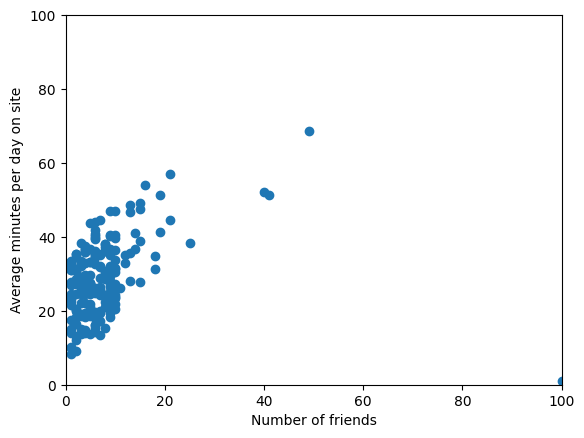

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

print('\nScatter plot for daily minutes vs number of friends:')
plt.scatter(num_friends, daily_minutes)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('Number of friends')
plt.ylabel('Average minutes per day on site')
plt.show()

The data point for somebody who has 100 friends but spends 1 minute per day looks like an outlier. Let's remove it (see pages 66-67 of the text book for a discussion).

This leads to much stronger correlation.

In [5]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

print('Correlation before outlier removal: {:.3f}'.format(correlation(num_friends, daily_minutes)))
print('Correlation after outlier removal: {:.3f}'.format(correlation(num_friends_good, daily_minutes_good)))

Correlation before outlier removal: 0.247
Correlation after outlier removal: 0.574


### Simple linear regression

That's the preliminaries all done. Now we can look at linear regression between two variables.

Let's assume that we think having more friends causes people to spend more time on the site (see pages 67-69 of the book for a good discussion of caveats and other possible explanations).

We're now going to build a simple linear model to describe this relationship.

In particular, we assume a model of the form:

`y_i = beta * x_i + alpha`

Note this takes us right back to [linear equations in algebra](https://en.wikipedia.org/wiki/Linear_equation):

`y = mx + b`

Looking back at the scatter plot and correlation, this does seem plausible if we assume some noise.

Let's see how this works for our data.

In [6]:
def predict(alpha, beta, x_i):
    """the linear model
    alpha and beta are our model parameters
    x_i is the data point
    return the predicted y value for x_i"""
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    """the difference between the true y_i
    and our predicted y value"""
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

def least_squares_fit(x,y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print("alpha:", alpha)
print("beta:", beta)

alpha: 22.94755241346903
beta: 0.903865945605865


### TODO Assessing fit and precision

R-squared gives an indication of [how well the linear model fits our data](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit). It ranges from 0 to 1, with higher values indicating a better fit.

In [7]:
# TODO: replace the content of this cell with your solution
# raise NotImplementedError

r_squared_value = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
print("r-squared:", r_squared_value)

# r-squared is 0.33 close to zero shows that our data do not fit enough the model

r-squared: 0.3291078377836305


### TODO Compare to scipy

- Compare our result to the `linregress` function from `scipy.stats`. Are alpha, beta and r-squared the same?
- The `scipy` implementation also returns a p-value for the H0 that slope is 0. What is the p-value? Can we reject the H0 at p<=0.01?

Note the scipy implementation returns a standard error, but it the error for the slope coefficient instead of the fitting error.

In [8]:
# TODO: replace the content of this cell with your solution
# raise NotImplementedError

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

from scipy.stats import linregress

# -----------------------------------
# linregress
slope, intercept, r_value, p_value, se = linregress(num_friends_good, daily_minutes_good)
print(intercept, slope, r_value**2)

# our results
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print("alpha", alpha)
print("beta", beta)
r_squared_value = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
print("r-squared", r_squared_value)

# alpha, beta are the same

# -----------------------------------
print('p_value', p_value)

# We are able to reject the H0 that slope is zero.

22.947552413469026 0.9038659456058652 0.32910783778362707
alpha 22.94755241346903
beta 0.903865945605865
r-squared 0.3291078377836305
p_value 3.676825862770313e-19


## EXERCISE: Multiple regression

Let's look at the [Boston Housing data set](http://lib.stat.cmu.edu/datasets/boston). This contains information about housing values by suburb and related information.

### Loading and visualising data

Let's load the data and have a quick look at some descriptive stats for our features.

In [9]:
import pandas as pd

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=feature_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [10]:
print('shape:', data.shape)
print('Descriptive stats for feature values:\n', data.describe().T[['mean', 'std', 'min', 'max', '50%']])

shape: (506, 14)
Descriptive stats for feature values:
                mean         std        min       max        50%
CRIM       3.613524    8.601545    0.00632   88.9762    0.25651
ZN        11.363636   23.322453    0.00000  100.0000    0.00000
INDUS     11.136779    6.860353    0.46000   27.7400    9.69000
CHAS       0.069170    0.253994    0.00000    1.0000    0.00000
NOX        0.554695    0.115878    0.38500    0.8710    0.53800
RM         6.284634    0.702617    3.56100    8.7800    6.20850
AGE       68.574901   28.148861    2.90000  100.0000   77.50000
DIS        3.795043    2.105710    1.12960   12.1265    3.20745
RAD        9.549407    8.707259    1.00000   24.0000    5.00000
TAX      408.237154  168.537116  187.00000  711.0000  330.00000
PTRATIO   18.455534    2.164946   12.60000   22.0000   19.05000
B        356.674032   91.294864    0.32000  396.9000  391.44000
LSTAT     12.653063    7.141062    1.73000   37.9700   11.36000
MEDV      22.532806    9.197104    5.00000   50.

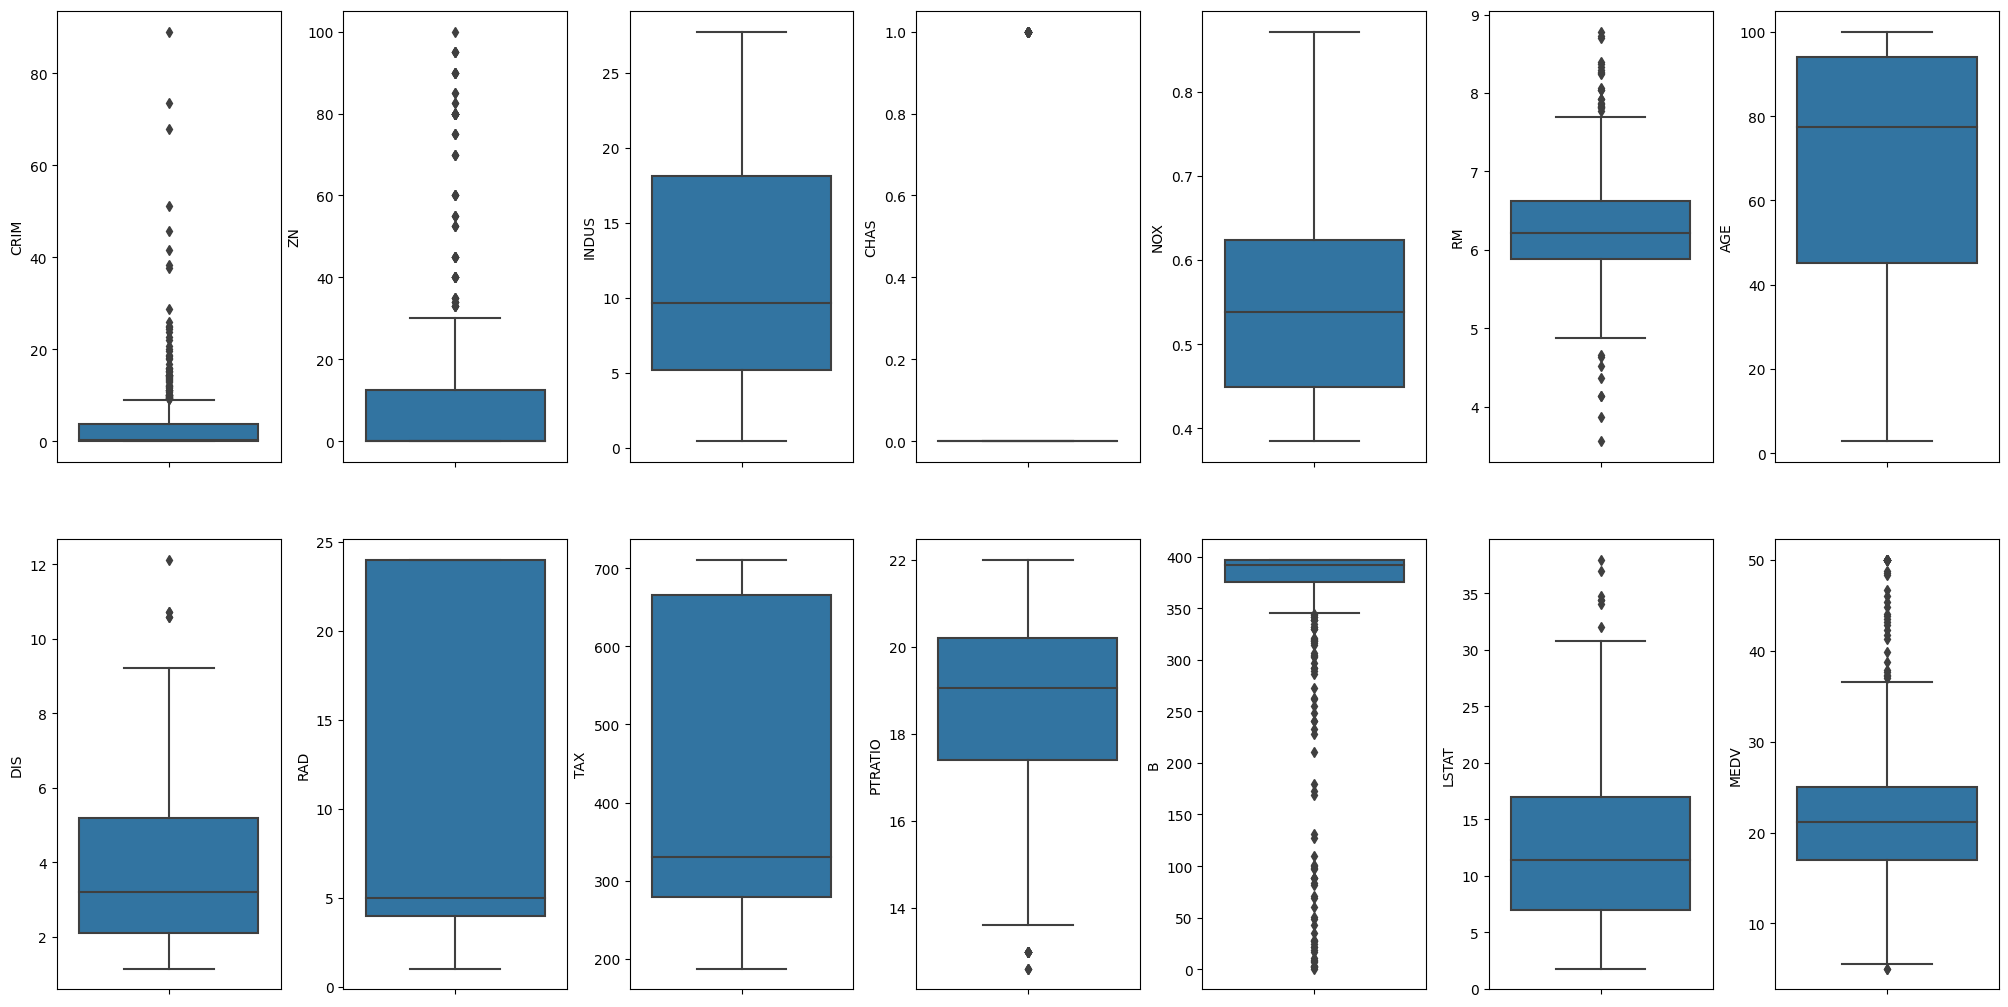

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Linear regression in scikit-learn

Now let's fit a linear model for predicting a suburbs median house value given the other features.

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import numpy as np

print(data.iloc[:,0:13].to_numpy().shape)
print(data.iloc[:,13:14].to_numpy().shape)

# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:13].to_numpy(),
                                                    data.iloc[:,13:14].to_numpy(),
                                                    test_size=0.33,
                                                    random_state=5) # so we get the same results

# Now let's fit a model
lm = LinearRegression()
lm.fit(X_train, Y_train)

print('Intercept:', lm.intercept_)
print('Coefficients:\n', lm.coef_)

# We use the score method to get r-squared
print('\nR-squared:', lm.score(X_train, Y_train))

# We can predict the median price for a new neighbourhoods
print('\nPredicted price of first five neighbourhoods from test split:\n', lm.predict(X_test)[:5])

# We can also calculate the mean squared error
print('\nTrain mean squared error:', np.mean((Y_train - lm.predict(X_train))**2))
print('Test mean squared error:', np.mean((Y_test - lm.predict(X_test))**2))

(506, 13)
(506, 1)
Intercept: [32.85893263]
Coefficients:
 [[-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
  -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
   3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
  -4.72644280e-01]]

R-squared: 0.7551332741779998

Predicted price of first five neighbourhoods from test split:
 [[37.46723562]
 [31.39154701]
 [27.1201962 ]
 [ 6.46843347]
 [33.62966737]]

Train mean squared error: 19.546758473534663
Test mean squared error: 28.53045876597476


### TODO Evaluating predictions 

- Does r_squared indicate a good fit?
- Use `mean_squared_error` from `sklearn.metrics` to calculate the mean squared error. Compare this to the value we calculated in the previous cell.

[Residual plots](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/) scatter residuals (y_true - y_predicted) on the y-axis versus predicted values on the x-axis. A residual plot indicates that a linear model is appropriate if the points are randomly distributed around the `y=0` line.

- Draw a residual plot with training data in blue and test data in green. Is a linear model appropriate for our data? Is prediction performance comparable to training performance?


Train mean squared error 19.546758473534663
Test mean squared error 28.53045876597476


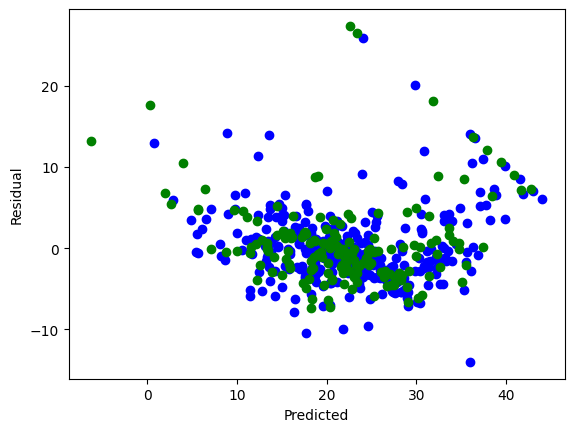

In [13]:
# TODO: replace the content of this cell with your solution
# raise NotImplementedError

#  r_squared is 0.755 close to 1 which means that it is a good fit

from sklearn.metrics import mean_squared_error
print('\nTrain mean squared error', mean_squared_error(Y_train, lm.predict(X_train), squared=True))
print('Test mean squared error', mean_squared_error(Y_test, lm.predict(X_test), squared=True))

plt.scatter(lm.predict(X_train), Y_train-lm.predict(X_train), c = 'b')
plt.scatter(lm.predict(X_test), Y_test-lm.predict(X_test), c = 'g')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

## EXERCISE: Logistic regression



We'll use the Iris data set. Like the digits data from week 7, this is another classic machine learning data set.

### Loading and visualising data

Let's load the data and have a quick look at some descriptive stats for our features.

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Descriptive stats for feature values:
---------------------------------------------------------------------------
Name                        Min        Max       Mean      Stdev     Median
---------------------------------------------------------------------------
sepal length (cm)          4.30       7.90       5.84       0.83       5.80
sepal width (cm)           2.00       4.40       3.06       0.43       3.00
petal length (cm)          1.00       6.90       3.76       1.76       4.35
petal width (cm)           0.10       2.50       1.20       0.76       1.30
---------------------------------------------------------------------------

Boxplots of feature values:


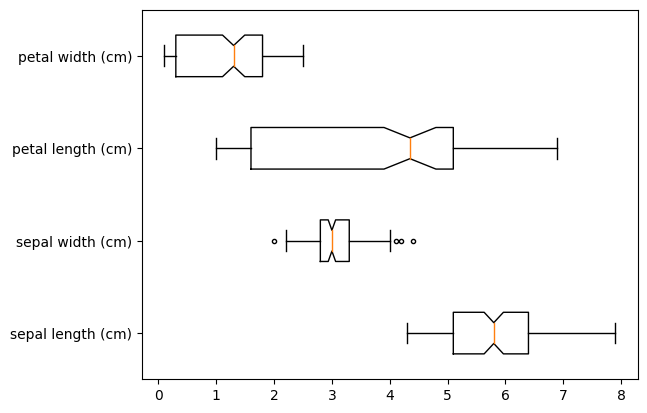

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def cols_from_rows(data):
    cols = [[] for _ in data[0]] # init with empty list for each column
    for row in data:
        for i, val in enumerate(row):
            cols[i].append(val)
    return cols

print('Descriptive stats for feature values:')
cols = cols_from_rows(iris.data)
print('-'*75)
print('{:20} {:>10} {:>10} {:>10} {:>10} {:>10}'.format('Name', 'Min', 'Max', 'Mean', 'Stdev', 'Median'))
print('-'*75)
for i, col in enumerate(cols):
    print('{:20} {:10.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'\
          .format(iris.feature_names[i], min(col), max(col), np.mean(col), np.std(col), np.median(col)))
print('-'*75)
    
print('\nBoxplots of feature values:')
plt.boxplot(cols_from_rows(iris.data), vert=False, notch=True, flierprops={'marker':'.'})
plt.yticks(range(1,5), iris.feature_names)
plt.show()

### Logistic regression in scikit-learn

Now let's use logistic regression to learn a model of iris type given sepal and petal measurements.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.33,
                                                    random_state=5) # so we get the same results

# Now let's fit a model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

print('Intercept:', logreg.intercept_)
print('Coefficients:\n', logreg.coef_)

# We can predict the type of new organisms given measurements
print('\nPredicted type of first five organisms from test split:', logreg.predict(X_test)[:5])
print('Actual type of first five organisms from test split:', Y_test[:5])

Intercept: [  8.775413     1.60989219 -10.38530519]
Coefficients:
 [[-0.40882379  0.8471058  -2.20548192 -0.96488141]
 [ 0.60527174 -0.44107978 -0.16035026 -0.8906139 ]
 [-0.19644796 -0.40602602  2.36583217  1.85549531]]

Predicted type of first five organisms from test split: [1 2 2 0 2]
Actual type of first five organisms from test split: [1 2 2 0 2]


### Evaluating classification

Recall from week 6 that `sklearn.metrics` includes various evaluation measures. 

In [17]:
from sklearn.metrics import classification_report
import pandas as pd
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(iris.target_names)])
print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

y_actu = pd.Series(Y_test, name='Actual')
y_pred_s1 = pd.Series(logreg.predict(X_test), name='Predicted')
confusion_matrix = pd.crosstab(y_actu, y_pred_s1)
print(confusion_matrix)

Classification report (0=setosa, 1=versicolor, 2=virginica):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Predicted   0   1   2
Actual               
0          16   0   0
1           0  16   1
2           0   0  17


Confusion matrix (0=setosa, 1=versicolor, 2=virginica):



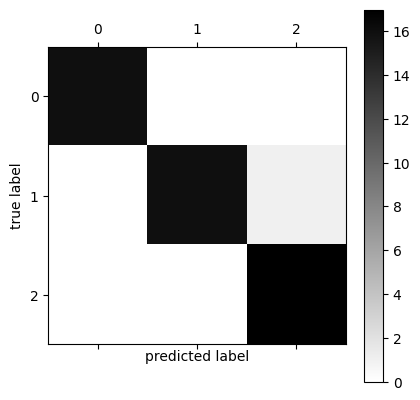

In [18]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print('Confusion matrix ({}):\n'.format(key))
plt.matshow(confusion_matrix(Y_test, logreg.predict(X_test)), cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()

### TODO Choose parameters using grid search


- Choose the best C values in [1, 10, 100, 1000, 10000, 100000, 1000000] and the best penalty in ['l1', 'l2']
- Which is the best C? Which is the best penalty?
- How do precision, recall and f1 scores compare?

In [19]:
# TODO: replace the content of this cell with your solution
# raise NotImplementedError

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression()
LRparam_grid = {'C': [1, 10, 100, 1000, 10000, 100000, 1000000], 'penalty': ['l1', 'l2']}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, cv=5)

# fitting the model for grid search 
LR_search.fit(X_train , Y_train)

# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Best params: %s' % LR_search.best_params_)

y_actu = pd.Series(Y_test, name='Actual')
y_pred_s1 = pd.Series(LR_search.predict(X_test), name='Predicted')
confusion_matrix = pd.crosstab(y_actu, y_pred_s1)
print(confusion_matrix)

Mean Accuracy: 0.980
Best params: {'C': 10, 'penalty': 'l2'}
Predicted   0   1   2
Actual               
0          16   0   0
1           0  16   1
2           0   1  16


# End of Tutorial. Many Thanks.